<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/S_05/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/S_05/50_Startups.csv'
dataset = pd.read_csv(fp)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [4]:
# create dummy variable for col 3 (state)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [5]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [8]:
# residual table
y_pred = regressor.predict(X_test)
y_diff = y_test - y_pred
np.set_printoptions(formatter={'all': lambda x: f"{x:,.2f}"})
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1),y_diff.reshape(len(y_diff),1)),1))

[[103,015.20 103,282.38 267.18]
 [132,582.28 144,259.40 11,677.12]
 [132,447.74 146,121.95 13,674.21]
 [71,976.10 77,798.83 5,822.73]
 [178,537.48 191,050.39 12,512.91]
 [116,161.24 105,008.31 -11,152.93]
 [67,851.69 81,229.06 13,377.37]
 [98,791.73 97,483.56 -1,308.17]
 [113,969.44 110,352.25 -3,617.19]
 [167,921.07 166,187.94 -1,733.13]]


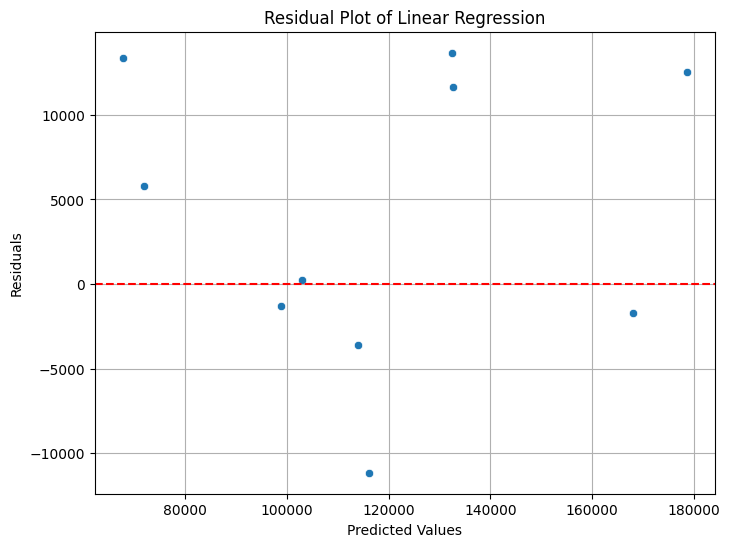

In [9]:
# Calculate residuals
residuals = y_test - y_pred

 # Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten())
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of Linear Regression")
plt.grid(True)
plt.show()

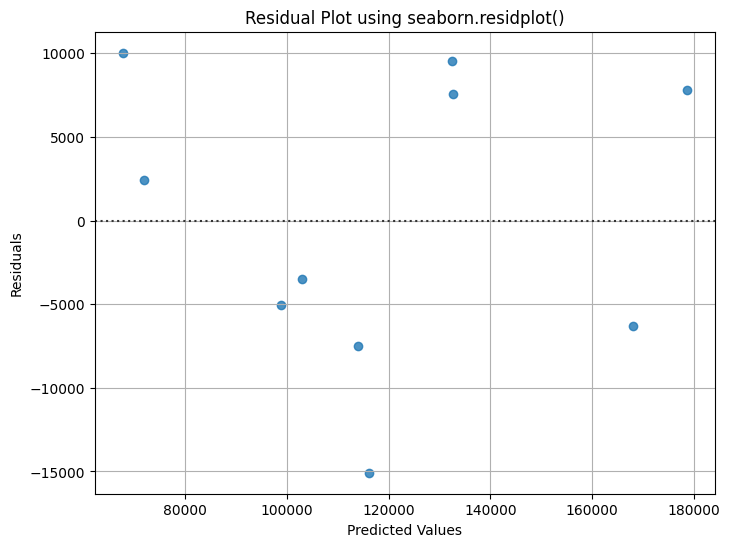

In [10]:
# Seaborn (previous steps to define X, y, model, and make predictions) ...

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred.flatten(), y=y_test.flatten()) # x is predicted, y is observed
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot using seaborn.residplot()")
plt.grid(True)
plt.show()

In [11]:
# intercept (bias) and coefficient (weight)
b=np.array(regressor.intercept_).reshape(1,1)
w=regressor.coef_
# Set print options to use a custom formatter for floats
np.set_printoptions(formatter={'all': lambda x: f"{x:,.2f}"})
print(f'intercept: {b}')
print(f'coefficients:{w}')


intercept: [[42,467.53]]
coefficients:[86.64 -872.65 786.01 0.77 0.03 0.04]


In [56]:
# make a prediction with input
X_input = '1.0 0.0 0.0 160000 130000 300000'
X_input =np.expand_dims(np.array([float(x) for x in X_input.split(" ")]),0)
y_result = regressor.predict(X_input)
print(f'y_result: {y_result}')





y_result: [181,566.92]
